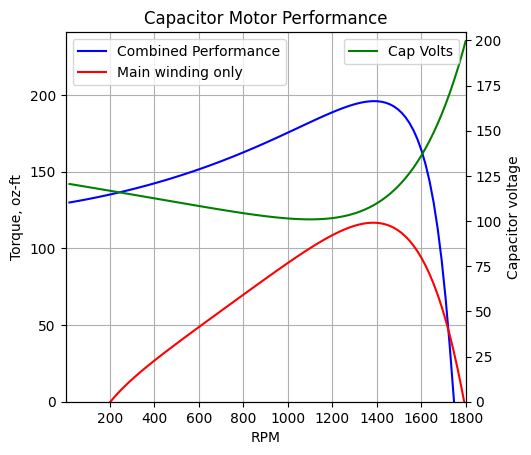

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from singlePhaseCircuit import get_combined_perf, get_main_perf

rpms_comb, torques_comb, cap_volts = get_combined_perf(
    Vm=115,
    Xo=20.55,
    Xm=1.52,
    Hp=0.75,
    Kr=0.926,
    Kp=0.96,
    Xa=2.37,
    r2=0.854,
    Va=115,
    a=1.25,
    sync=1800,
    fe_loss=94.7,
    f_w=13.3,
    r1=0.695,
    r1a=2.7,
    Rc=0.46,
    Xc=-5.82
)

rpms_main, torques_main = get_main_perf(
    r1=0.695,
    r2=0.854,
    X=1.32,
    Xo=12.55,
    Kr=0.926,
    feff=20,
    fehf=19,
    f_w=13.3,
    hp=0.75,
    volts=115,
    hertz=60,
    poles=4, 
    sync=1800
)

rpms_comb = np.array(rpms_comb)
torques_comb = np.array(torques_comb)

rpms_main = np.array(rpms_main)
torques_main = np.array(torques_main)

fig, ax = plt.subplots()
fig.subplots_adjust(right=0.75)
twin1 = ax.twinx()

p1, p2 = ax.plot(rpms_comb, torques_comb, "b", rpms_main, torques_main, "r")
p3 = twin1.plot(rpms_comb, cap_volts, "g")

ax.set(ylim=(0, max(torques_comb)+45), xlabel="RPM", ylabel="Torque, oz-ft")
ax.set_xlim(1, 1800)
twin1.set(ylim=(0, max(cap_volts)+5), ylabel="Capacitor voltage")

ax.grid()
ax.set_title('Capacitor Motor Performance')
ax.legend(['Combined Performance', 'Main winding only'], loc='upper left')
twin1.legend(['Cap Volts'], loc='upper right')
plt.show()